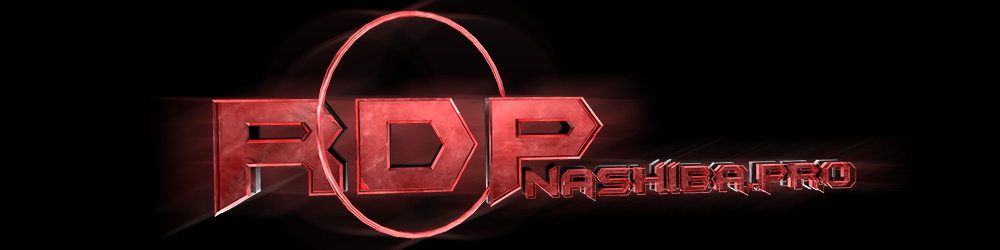

# **RDP by [nashiba.pro](https://nashiba.pro/)**

**Ссылки на все наши сообщества:**

🔺YouTube  - https://nashiba.pro/youtube

🔺Telegram - https://nashiba.pro/telegram

🔺Instagram -  https://www.instagram.com/nashiba.pro/

📲**Получить консультацию (Telegram)**- https://nashiba.pro/artur_kurator 

In [ ]:
#@title **Созадем доступы**
import os

username = "user" #@param {type:"string"}
password = "root" #@param {type:"string"}

print("Creating User and Setting it up")

# Creation of user
os.system(f"useradd -m {username}")

# Add user to sudo group
os.system(f"adduser {username} sudo")
    
# Set password of user to 'root'
os.system(f"echo '{username}:{password}' | sudo chpasswd")

# Change default shell from sh to bash
os.system("sed -i 's/\/bin\/sh/\/bin\/bash/g' /etc/passwd")

print("User Created and Configured")

Creating User and Setting it up
User Created and Configured


In [ ]:
#@title **RDP**
#@markdown  Подождите 5 минут пока установится скрипт

import os
import subprocess

#@markdown Копируем скрипт вот тут http://remotedesktop.google.com/headless вставляем в поле CRP и запускаем

CRP = "DISPLAY= /opt/google/chrome-remote-desktop/start-host --code=\"4/0AY0e-g7eFG_1hHFppIh8xLJR9xB3FtBGVx25FXmyHsmTEK0PMdNsR2GcubDdxbpaeq3lyA\" --redirect-url=\"https://remotedesktop.google.com/_/oauthredirect\" --name=$(hostname)" #@param {type:"string"}


Pin = 123456 #@param {type: "integer"}


class CRD:
    def __init__(self):
        os.system("apt update")
        self.installCRD()
        self.installDesktopEnvironment()
        self.installGoogleChorme()
        self.finish()

    @staticmethod
    def installCRD():
        print("Installing Chrome Remote Desktop")
        subprocess.run(['wget', 'https://dl.google.com/linux/direct/chrome-remote-desktop_current_amd64.deb'], stdout=subprocess.PIPE)
        subprocess.run(['dpkg', '--install', 'chrome-remote-desktop_current_amd64.deb'], stdout=subprocess.PIPE)
        subprocess.run(['apt', 'install', '--assume-yes', '--fix-broken'], stdout=subprocess.PIPE)

    @staticmethod
    def installDesktopEnvironment():
        print("Installing Desktop Environment")
        os.system("export DEBIAN_FRONTEND=noninteractive")
        os.system("apt install --assume-yes xfce4 desktop-base xfce4-terminal")
        os.system("bash -c 'echo \"exec /etc/X11/Xsession /usr/bin/xfce4-session\" > /etc/chrome-remote-desktop-session'")
        os.system("apt remove --assume-yes gnome-terminal")
        os.system("apt install --assume-yes xscreensaver")
        os.system("systemctl disable lightdm.service")

    @staticmethod
    def installGoogleChorme():
        print("Installing Google Chrome")
        subprocess.run(["wget", "https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb"], stdout=subprocess.PIPE)
        subprocess.run(["dpkg", "--install", "google-chrome-stable_current_amd64.deb"], stdout=subprocess.PIPE)
        subprocess.run(['apt', 'install', '--assume-yes', '--fix-broken'], stdout=subprocess.PIPE)

    @staticmethod
    def finish():
        print("Finalizing")
        os.system(f"adduser {username} chrome-remote-desktop")
        command = f"{CRP} --pin={Pin}"
        os.system(f"su - {username} -c '{command}'")
        os.system("service chrome-remote-desktop start")
        print("Finished Succesfully")


try:
    if username:
        if CRP == "":
            print("Please enter authcode from the given link")
        elif len(str(Pin)) < 6:
            print("Enter a pin more or equal to 6 digits")
        else:
            CRD()
except NameError as e:
    print("username variable not found")
    print("Create a User First")

Installing Chrome Remote Desktop
Installing Desktop Environment
Installing Google Chrome
Finalizing
Finished Succesfully
